## IMPORT LIBRARIES

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, RobustScaler, MinMaxScaler, StandardScaler

from sklearn.linear_model import LinearRegression, SGDRegressor, Lasso, Ridge
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, ExtraTreesRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## READ DATA

In [2]:
df = pd.read_csv("laptop_prices.csv")

In [3]:
df

,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenW,...,RetinaDisplay,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model
0,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1339.69,Standard,2560,...,Yes,Intel,2.3,Core i5,128,0,SSD,No,Intel,Iris Plus Graphics 640
1,Apple,Macbook Air,Ultrabook,13.3,8,macOS,1.34,898.94,Standard,1440,...,No,Intel,1.8,Core i5,128,0,Flash Storage,No,Intel,HD Graphics 6000
2,HP,250 G6,Notebook,15.6,8,No OS,1.86,575.00,Full HD,1920,...,No,Intel,2.5,Core i5 7200U,256,0,SSD,No,Intel,HD Graphics 620
3,Apple,MacBook Pro,Ultrabook,15.4,16,macOS,1.83,2537.45,Standard,2880,...,Yes,Intel,2.7,Core i7,512,0,SSD,No,AMD,Radeon Pro 455
4,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1803.60,Standard,2560,...,Yes,Intel,3.1,Core i5,256,0,SSD,No,Intel,Iris Plus Graphics 650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1270,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,4,Windows 10,1.80,638.00,Full HD,1920,...,No,Intel,2.5,Core i7 6500U,128,0,SSD,No,Intel,HD Graphics 520
1271,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,16,Windows 10,1.30,1499.00,Quad HD+,3200,...,No,Intel,2.5,Core i7 6500U,512,0,SSD,No,Intel,HD Graphics 520
1272,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,2,Windows 10,1.50,229.00,Standard,1366,...,No,Intel,1.6,Celeron Dual Core N3050,64,0,Flash Storage,No,Intel,HD Graphics
1273,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,6,Windows 10,2.19,764.00,Standard,1366,...,No,Intel,2.5,Core i7 6500U,1024,0,HDD,No,AMD,Radeon R5 M330


In [4]:
df.shape

(1275, 23)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company               1275 non-null   object 
 1   Product               1275 non-null   object 
 2   TypeName              1275 non-null   object 
 3   Inches                1275 non-null   float64
 4   Ram                   1275 non-null   int64  
 5   OS                    1275 non-null   object 
 6   Weight                1275 non-null   float64
 7   Price_euros           1275 non-null   float64
 8   Screen                1275 non-null   object 
 9   ScreenW               1275 non-null   int64  
 10  ScreenH               1275 non-null   int64  
 11  Touchscreen           1275 non-null   object 
 12  IPSpanel              1275 non-null   object 
 13  RetinaDisplay         1275 non-null   object 
 14  CPU_company           1275 non-null   object 
 15  CPU_freq             

## Data Analysis

In [6]:
sns.set_style('darkgrid')

### UniVariate Analysis

#### Company

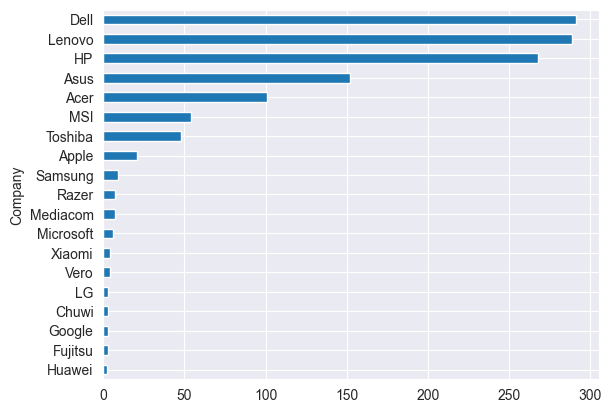

In [7]:
df.Company.value_counts().sort_values(ascending=True).plot(kind = 'barh')
plt.show()

#### TypeName

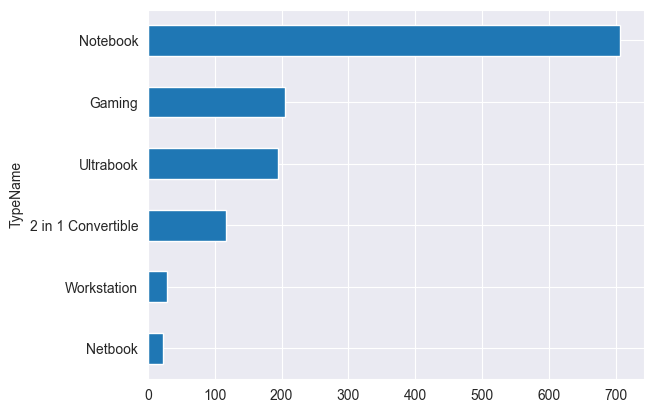

In [8]:
df.TypeName.value_counts().sort_values(ascending=True).plot(kind="barh")
plt.show()

#### Inches

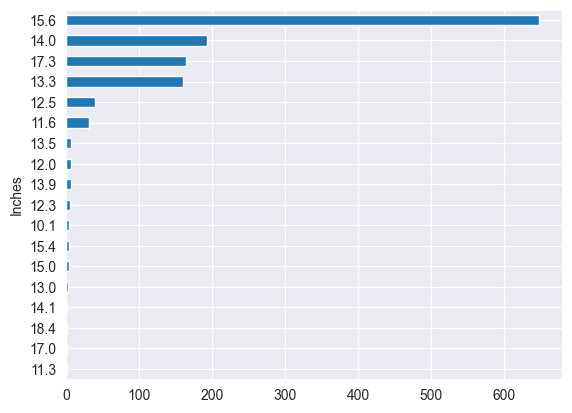

In [9]:
df['Inches'].value_counts().sort_values(ascending=True).plot(kind='barh')
plt.show()

#### Operating System

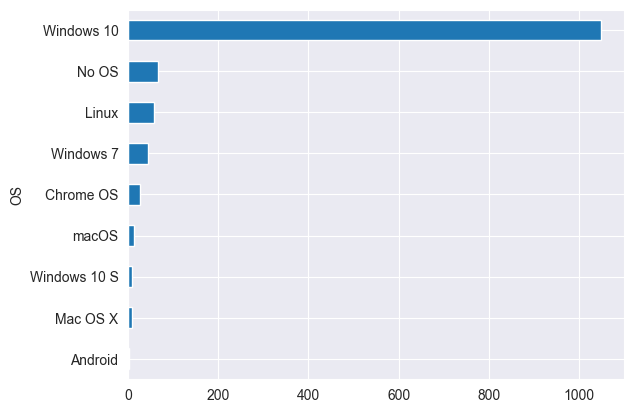

In [10]:
df['OS'].value_counts().sort_values(ascending=True).plot(kind='barh')
plt.show()

#### Ram (GB)

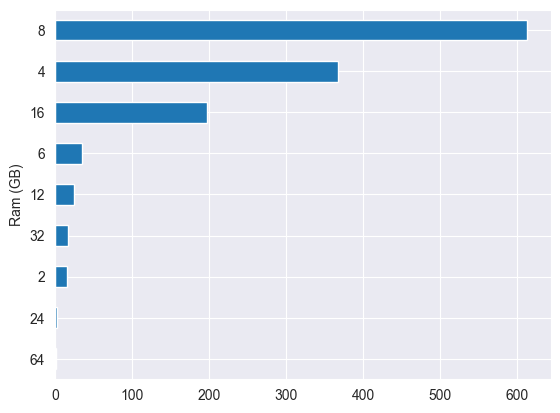

In [11]:
df['Ram'].value_counts().sort_values(ascending=True).plot(kind='barh')
plt.ylabel('Ram (GB)')
plt.show()

#### Weight(Kgs)

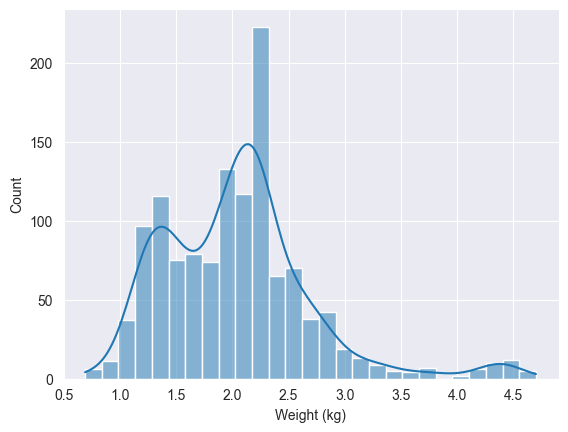

In [12]:
sns.histplot(df, x='Weight', kde=True)
plt.xlabel('Weight (kg)')
plt.show()

#### Price(euros)

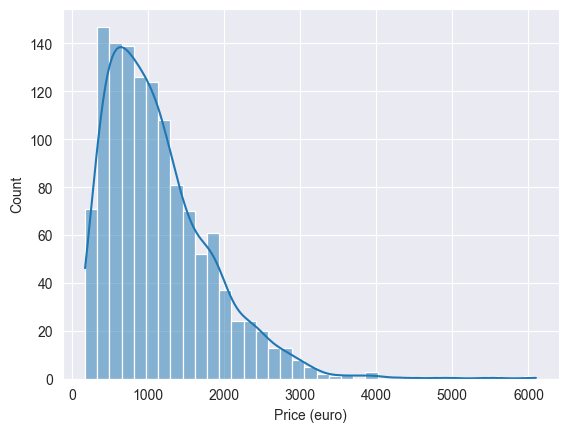

In [13]:
sns.histplot(df, x='Price_euros', kde=True)
plt.xlabel('Price (euro)')
plt.show()

#### ScreenResolution

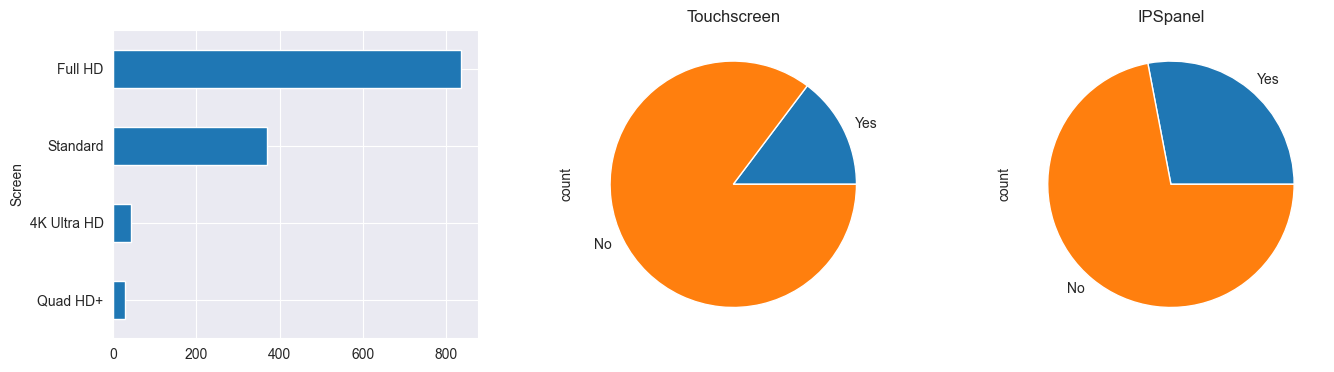

In [15]:
plt.figure(figsize=(16,4))

plt.subplot(1, 3, 1)
df['Screen'].value_counts().sort_values(ascending=True).plot(kind='barh')

plt.subplot(1, 3, 2)
df['Touchscreen'].value_counts().sort_values(ascending=True).plot(kind='pie')
plt.title('Touchscreen')

plt.subplot(1, 3, 3)
df['IPSpanel'].value_counts().sort_values(ascending=True).plot(kind='pie')
plt.title('IPSpanel')

plt.show()

#### CPU

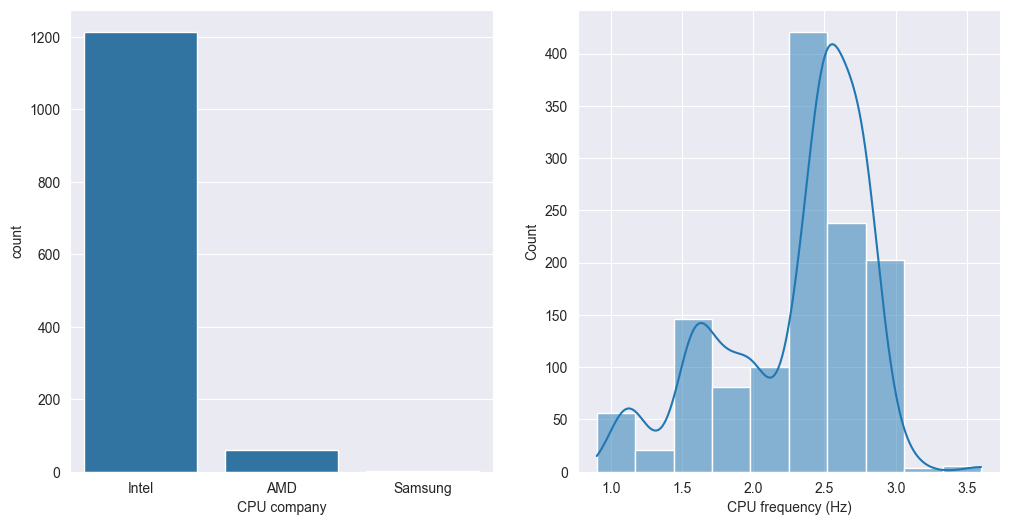

In [16]:
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
sns.countplot(df, x='CPU_company')
plt.xlabel('CPU company')
plt.subplot(1, 2, 2)
sns.histplot(df, x='CPU_freq', kde=True, bins=10)
plt.xlabel('CPU frequency (Hz)')
plt.show()

#### Storage

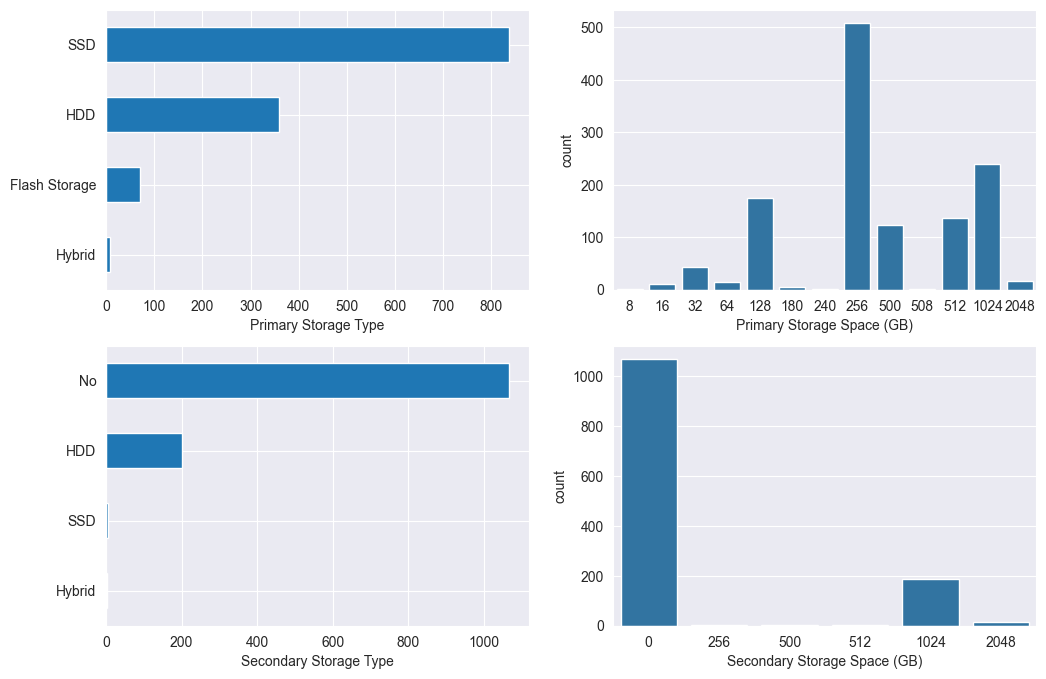

In [17]:
plt.figure(figsize=(12,8))

plt.subplot(2, 2, 1)
df['PrimaryStorageType'].value_counts().sort_values(ascending=True).plot(kind='barh')
plt.xlabel('Primary Storage Type')
plt.ylabel('')
plt.subplot(2, 2, 2)
sns.countplot(df, x='PrimaryStorage')
plt.xlabel('Primary Storage Space (GB)')
plt.subplot(2, 2, 3)

df['SecondaryStorageType'].value_counts().sort_values(ascending=True).plot(kind='barh')
plt.xlabel('Secondary Storage Type')
plt.ylabel('')
plt.subplot(2, 2, 4)
sns.countplot(df, x='SecondaryStorage')
plt.xlabel('Secondary Storage Space (GB)')

plt.show()


### GPU

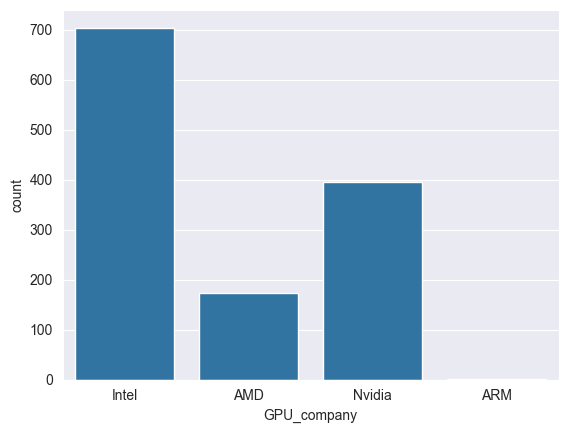

In [18]:
sns.countplot(df, x='GPU_company')
plt.show()

## BiVariate Analysis

#### Price by Ram

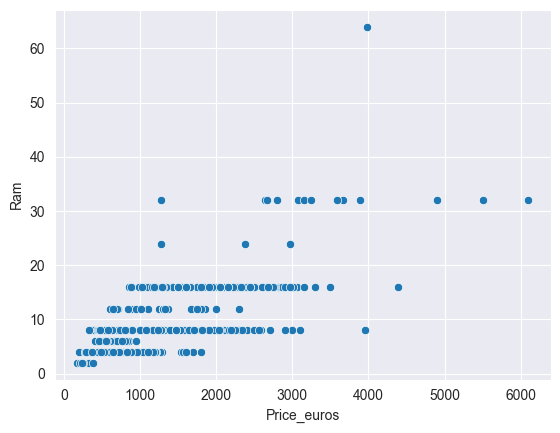

In [19]:
sns.scatterplot(df, x='Price_euros', y='Ram')
plt.show()

#### Price by Weight

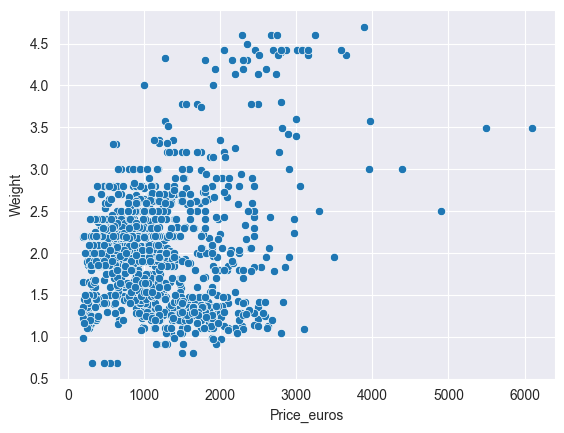

In [20]:
sns.scatterplot(df, x='Price_euros', y='Weight')
plt.show()

#### Price by ScreenResolution

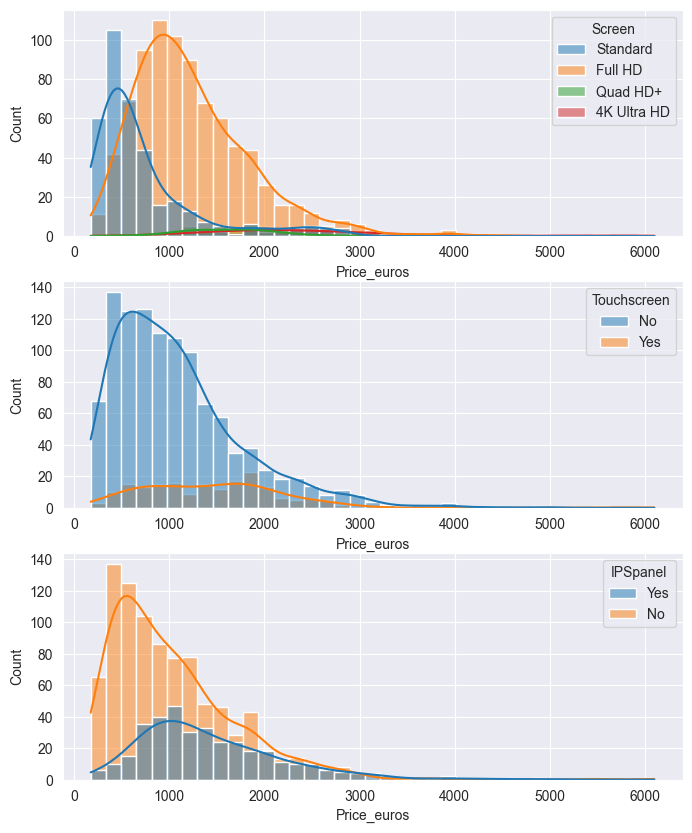

In [21]:
plt.figure(figsize=(8,10))

plt.subplot(3, 1, 1)
sns.histplot(df, x='Price_euros', hue='Screen', kde=True)

plt.subplot(3, 1, 2)
sns.histplot(df, x='Price_euros', hue='Touchscreen', kde=True)

plt.subplot(3, 1, 3)
sns.histplot(df, x='Price_euros', hue='IPSpanel', kde=True)

plt.show()

## MultiVariate Analysis

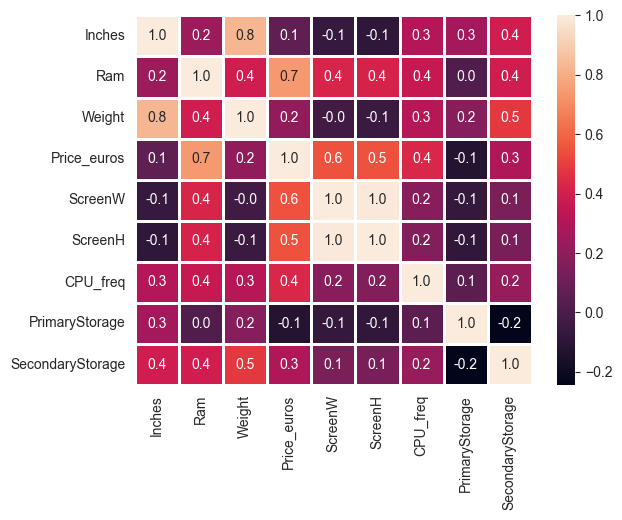

In [22]:
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt='.1f', linewidths=2)
plt.show()

## Machine Learning

#### Encode all categorical data

In [23]:
encoder= LabelEncoder()
for col in df.columns:
	if df[col].dtype=="O":
		df[col]= encoder.fit_transform(df[col])
del(encoder) 

#### Split dataset into X and y.

In [24]:
X= df.drop(['Price_euros'], axis=1)
y= df['Price_euros']

#### Split dataset into train and test data.

In [25]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

# scaler= RobustScaler()
# X_train= scaler.fit_transform(X_train)
# X_test=  scaler.fit_transform(X_test)
# y_train= scaler.fit_transform(y_train.to_frame()).ravel()
# y_test=  scaler.fit_transform(y_test.to_frame()).ravel()
# del(scaler)

print(
	f'X_train shape: {X_train.shape}\n'+
	f'y_train shape: {y_train.shape}\n'+
	f'X_test shape:  {X_test.shape}\n'+
	f'y_test shape:  {y_test.shape}'
)

X_train shape: (1020, 22)
y_train shape: (1020,)
X_test shape:  (255, 22)
y_test shape:  (255,)


#### General function for training and evaluating a model.

In [28]:
def model_report(model, verbose=True):
	model.fit(X_train, y_train)

	y_pred= model.predict(X_test)
	trainScore= model.score(X_train, y_train)
	testScore=  model.score(X_test, y_test)
	r2Score=    r2_score(y_test, y_pred)
	absoluteError= mean_absolute_error(y_test, y_pred)
	squaredError=  mean_squared_error(y_test, y_pred)

	if verbose:
		print('Train Score: %f'%trainScore)
		print('Test Score:  %f'%testScore)
		print('R2 Score:    %f'%r2Score)
		print('Mean Absolute Error: %f'%absoluteError)
		print('Mean Absolute Error: %f'%squaredError)
		plt.scatter(y_pred, y_test)
		plt.xlabel('Predicted Values')
		plt.ylabel('True Values')
		plt.show()
		print()
	
	return {
		'train':    trainScore,
		'test':     testScore,
		'r2score':  r2Score,
		'absolute': absoluteError,
		'squared':  squaredError,
	}

#### List of models we want to evaluate

In [29]:
models_dict= {
	'LinearRegression':      LinearRegression(),
	'Lasso':                 Lasso(),
	'Ridge':                 Ridge(),
        # 'SGDRegressor':          SGDRegressor(),
        # 'Support Vector':        SVR(),
	'KNeighborsRegressor':   KNeighborsRegressor(),
	'DecisionTreeRegressor': DecisionTreeRegressor(),
	'RandomForestRegressor': RandomForestRegressor(),
	'BaggingRegressor':      BaggingRegressor(),
	'ExtraTreesRegressor':   ExtraTreesRegressor(),
	'AdaBoostRegressor':     AdaBoostRegressor(),
	'XGBRegressor':          XGBRegressor(),
	'CatBoostRegressor':     CatBoostRegressor(verbose=False),
    'LGBMRegressor':         LGBMRegressor(),
}
models= [{'name':k, 'obj':v} for k,v in models_dict.items()]

i= 0
for model in models:
        print("Evaluating %s..."%model['name'])
        print("%d/%d models"%(i, len(models)), end='\r')
        model.update(model_report(model['obj'], verbose=False))
        i+= 1
print("%d/%d models evaluated"%(i, len(models)))
print("done")

Evaluating LinearRegression...
Evaluating Lasso...
Evaluating Ridge...
Evaluating KNeighborsRegressor...
Evaluating DecisionTreeRegressor...
Evaluating RandomForestRegressor...
Evaluating BaggingRegressor...
Evaluating ExtraTreesRegressor...
Evaluating AdaBoostRegressor...
Evaluating XGBRegressor...
Evaluating CatBoostRegressor...
Evaluating LGBMRegressor...
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000641 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 623
[LightGBM] [Info] Number of data points in the train set: 1020, number of used features: 21
[LightGBM] [Info] Start training from score 1124.689293
12/12 models evaluated
done


### Conclusion

In [30]:
pd.DataFrame({
	'Algorithm':           [model['name']     for model in models],
	'Train Score':         [model['train']    for model in models],
	'Test Score':          [model['test']     for model in models],
	'R2 Score':            [model['r2score']  for model in models], #same as Test Score
	'Mean Absolute Error': [model['absolute'] for model in models],
	'Mean Squared Error':  [model['squared']  for model in models],
}).set_index('Algorithm').sort_values(by='Test Score', ascending=False)

,Train Score,Test Score,R2 Score,Mean Absolute Error,Mean Squared Error
Algorithm,,,,,
CatBoostRegressor,0.982348,0.918683,0.918683,137.824990,40360.717317
XGBRegressor,0.997401,0.898481,0.898481,148.461867,50388.011425
ExtraTreesRegressor,0.999651,0.878756,0.878756,163.778129,60177.934483
RandomForestRegressor,0.977660,0.876751,0.876751,162.062488,61173.218949
LGBMRegressor,0.946025,0.856625,0.856625,158.149522,71162.722498
BaggingRegressor,0.969850,0.851764,0.851764,168.589902,73575.445770
LinearRegression,0.721759,0.741752,0.741752,257.812946,128178.690557
Ridge,0.721746,0.741734,0.741734,257.885390,128187.371004
Lasso,0.721179,0.741346,0.741346,259.253596,128379.963119
